# Apply Random Forest model

This script will classify an input file using an imported random forest model.  Input data to be classified is generated from the script `1_TidallyFilteredComposites.ipynb`.  The RF model is generated using the `2_RandomForest_classifier.ipynb` script.  

### Import modules

In [15]:
from joblib import load
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import RF_classifier

## User Inputs

In [17]:
# location of rf model exported from 'RandomForest_classifier.ipynb'
rf_model = 'results/RF_Model.joblib'

# Summary stats file to be classified 
# (i.e.exported file from 'TidallyFilteredComposites.ipynb')
data = 'results/eden_allSummaryStats.nc'

#name of output classified geotiff
classification_output = 'results/eden_classified_mangroves.tif'

# Names of output classification classes (only for plotting)
classification_names = ['Water', 'Clay Pan', 'Salt Marsh', 'Mangrove']

## Load in RF model

In [10]:
classifier = load(rf_model)

## Classify inputs

In [11]:
# Run classification and export to file
analysis_xarray = xr.open_dataset(data)
class_array, prob_array = RF_classifier.randomforest_classify(
    classifier=classifier,
    analysis_data=analysis_xarray,
    classification_output=classification_output,
    class_prob=True)

# analysis_xarray = analysis_xarray.drop('crs')

Data to classify:
  Rows: 509
  Columns: 460
  Bands: 17

Classification processing...
  0 nodata cells removed
  Classification exported

Class probability processing...
  Class probability exported


## Plot results

Class 1 = Water
Class 2 = Clay Pan
Class 3 = Salt Marsh
Class 4 = Mangrove


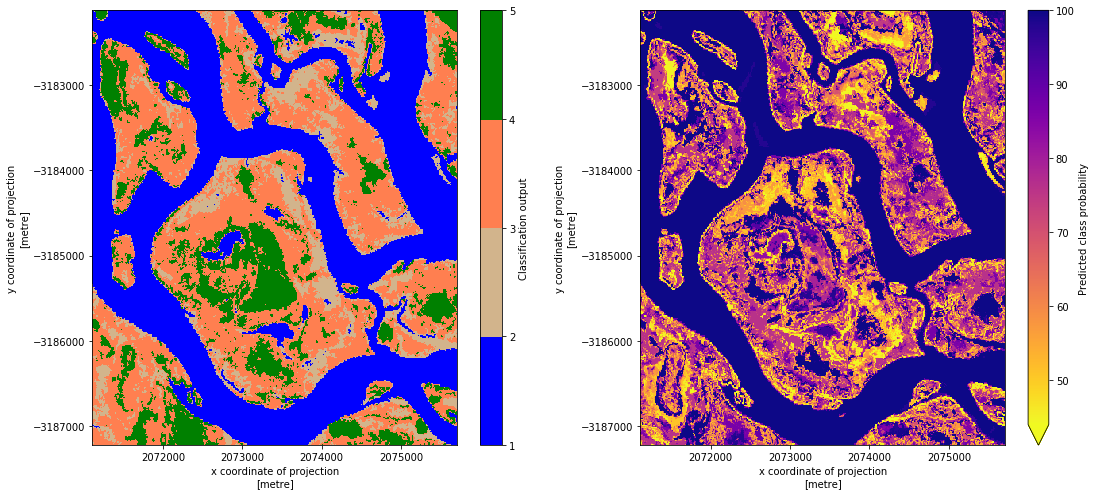

In [18]:
# Plot output classification
class_xarray = xr.DataArray(class_array,
                            coords=[analysis_xarray.y, analysis_xarray.x],
                            dims=['y', 'x'],
                            name='Classification output')

prob_xarray = xr.DataArray(prob_array,
                           coords=[analysis_xarray.y, analysis_xarray.x],
                           dims=['y', 'x'],
                           name='Predicted class probability')

fig, axes = plt.subplots(ncols=2, figsize=(18, 8))
class_xarray.plot(ax=axes[0], levels=list(np.unique(class_array))+[len(np.unique(class_array))+1],cmap=['blue', 'tan', 'coral', 'green'])
prob_xarray.plot(ax=axes[1], cmap='plasma_r',
                 vmin=np.percentile(prob_array, 3),
                 vmax=np.percentile(prob_array, 97))

for name, integer in zip(classification_names, np.unique(class_array)):
    print("Class " +str(int(integer))+" = " + name)
